In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import warnings
from imblearn.combine import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import TomekLinks

In [2]:
df = pd.read_csv('kaggle_data/human.csv',encoding='cp949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
df.rename(columns={'아이디':'ID', '나이':'age','노동 계급':'Working Class', '학력':'Academic Background', 
                   '교육 수':'Education Number', '혼인 상태':'Married','직업':'Job', '관계':'Relationship',
                   '인종':'Race', '성별':'Sex', '자본 이득':'Capital Gain', '자본 손실':'Capital Loss',
                   '주당 시간':'Hours Per Week', '모국':'Country' }, inplace=True)

In [4]:
df.head()

,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Country
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
ID                     32561 non-null object
age                    32561 non-null int64
Working Class          30725 non-null object
fnlwgt                 32561 non-null int64
Academic Background    32561 non-null object
Education Number       32561 non-null int64
Married                32561 non-null object
Job                    30718 non-null object
Relationship           32561 non-null object
Race                   32561 non-null object
Sex                    32561 non-null object
Capital Gain           32561 non-null int64
Capital Loss           32561 non-null int64
Hours Per Week         32561 non-null int64
Country                31978 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

ID                        0
age                       0
Working Class          1836
fnlwgt                    0
Academic Background       0
Education Number          0
Married                   0
Job                    1843
Relationship              0
Race                      0
Sex                       0
Capital Gain              0
Capital Loss              0
Hours Per Week            0
Country                 583
dtype: int64

In [7]:
df.dropna()
#df.fillna(0, inplace = True)

,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Country
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


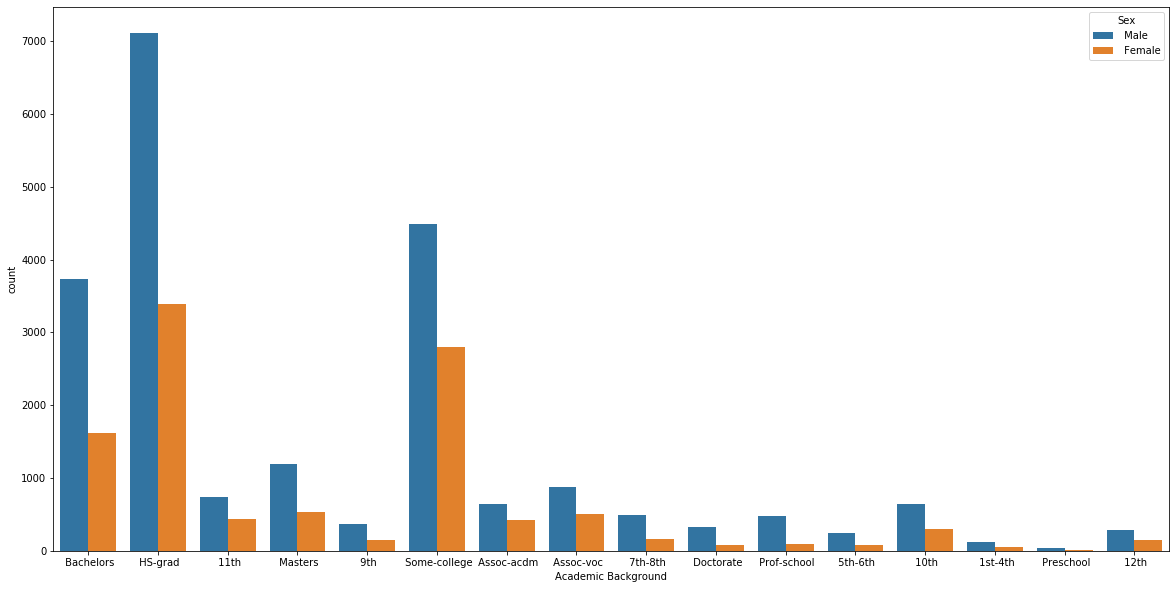

In [8]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.countplot('Academic Background',hue='Sex',data=df)
plt.show()

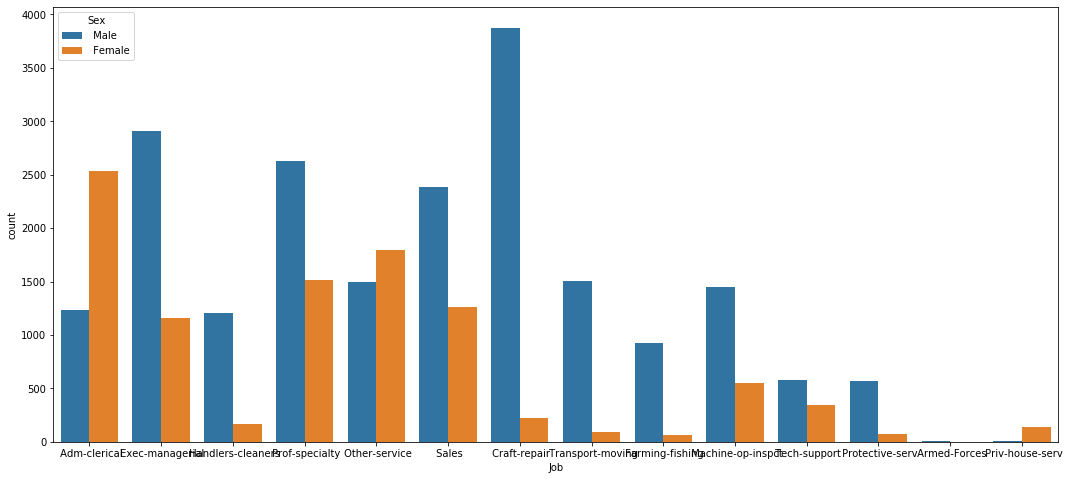

In [9]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('Job',hue='Sex',data=df)
plt.show()

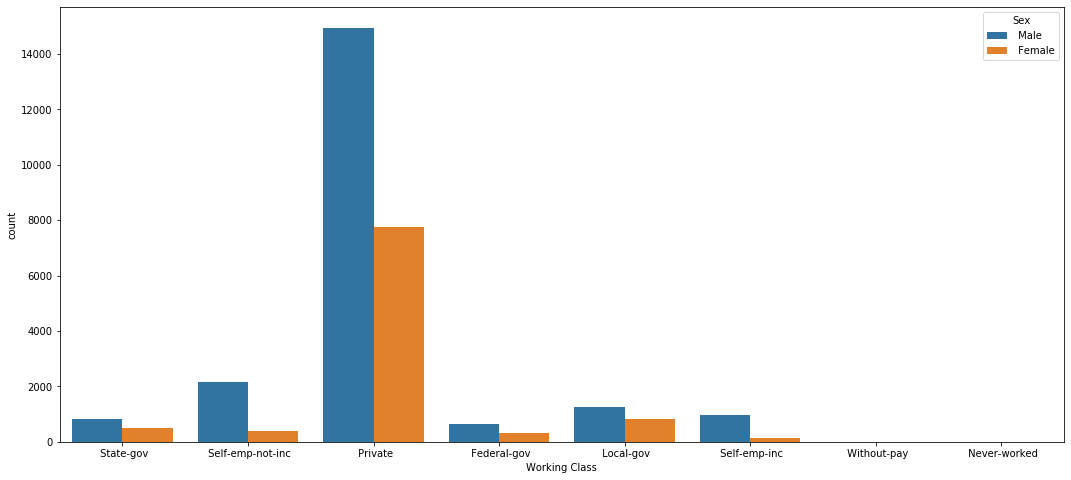

In [10]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('Working Class',hue='Sex',data=df)
plt.show()

### 나이 별 그룹화

In [11]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [12]:
df['age_level'] = df['age'].apply(lambda x : 1 if x < 20
                                 else 2 if 20 <= x < 40
                                 else 3 if 40 <= x < 60
                                 else 4)

### 주 근로 시간 그룹화

In [13]:
df['Hours Per Week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours Per Week, dtype: float64

In [14]:
df['Hours Per Week_level'] = df['Hours Per Week'].apply(lambda x : 1 if x < 25
                                 else 2 if 25 <= x < 40
                                 else 3 if 40 <= x < 60
                                 else 4)

### Capital 그룹화

In [15]:
np.var(df['Capital Gain'])

54540864.09042653

In [16]:
np.var(df['Capital Loss'])

162371.95096016672

In [17]:
df['Capital Gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

In [18]:
df['Capital Loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64

In [19]:
a = df['Capital Gain'] > 0
b = df['Capital Loss'] > 0
df['Capital'] = (a & b)
df['Capital'].value_counts()

False    32561
Name: Capital, dtype: int64

In [20]:
df['Capital'] = df['Capital Gain'] - df['Capital Loss']

In [21]:
df['Capital'] = df['Capital'].apply(lambda x: 2 if x > 0
                                   else 1 if x < 0
                                   else 0)

In [22]:
# 2 : 'Capital Gain' > 0
# 1 : 'Capital Loss' > 0
# 0 : 'Capital Gain' & 'Capital Loss' == 0
df['Capital'].value_counts()

0    28330
2     2712
1     1519
Name: Capital, dtype: int64

### dtype 변경

In [23]:
obj1 = ['Working Class', 'Academic Background', 'Married', 'Job', 'Relationship', 'Race', 'Country', 'Sex']
df[obj1] = df[obj1].apply(lambda x: x.astype('category').cat.codes)
df.head()

,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Country,age_level,Hours Per Week_level,Capital
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,2,3,2
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,3,1,0
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,2,3,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,3,3,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,2,3,0


In [24]:
df.corr()

,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Country,age_level,Hours Per Week_level,Capital
age,1.000000,3.787353e-03,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,9.087847e-01,0.071364,0.133213
Working Class,0.003787,1.000000e+00,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,-4.521878e-07,0.102026,0.021315
fnlwgt,-0.076646,-1.665562e-02,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-7.058595e-02,-0.004881,-0.007910
Academic Background,-0.010508,2.351319e-02,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,3.196024e-02,0.049711,0.026357
Education Number,0.036527,5.208502e-02,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,5.345671e-02,0.123087,0.138196
Married,-0.266288,-6.473124e-02,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-2.325738e-01,-0.197813,-0.073171
Job,-0.020947,2.548918e-01,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,-2.055476e-02,0.046199,0.022739
Relationship,-0.263698,-9.046107e-02,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-2.385612e-01,-0.252851,-0.095239
Race,0.028718,4.974207e-02,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,2.308255e-02,0.020582,0.029157
Sex,0.088832,9.598083e-02,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,7.435820e-02,0.235150,0.076956


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTETomek

In [26]:
dfX = df.drop(['ID','Sex'],axis=1)
dfy = df['Sex']
X_train, X_test, y_train, y_test = train_test_split(
     dfX,dfy,random_state=0)

In [27]:
tree3 = DecisionTreeClassifier(max_depth=6, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      2701
           1       0.90      0.83      0.86      5440

    accuracy                           0.83      8141
   macro avg       0.80      0.82      0.81      8141
weighted avg       0.84      0.83      0.83      8141



### SMOTEENN

In [28]:
X_resampled, y_resampled = SMOTEENN(random_state=0).fit_sample(dfX, dfy)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)

(32561, 16) (20051, 16) (15038, 16) (5013, 16)


In [29]:
tree3 = DecisionTreeClassifier(max_depth=6, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2723
           1       0.97      0.70      0.81      2290

    accuracy                           0.85      5013
   macro avg       0.88      0.84      0.85      5013
weighted avg       0.87      0.85      0.85      5013



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
pred = gb.predict(X_test)
print("정확도 : {0: 3f}".format(accuracy_score(y_test, pred)))

정확도 :  0.879912


In [34]:
gb_param_grid = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 10],
    'min_samples_split' : [2, 3, 5, 10],
    'learning_rate' : [0.05, 0.1, 0.2]
}

In [35]:
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, scoring='accuracy', n_jobs = -1, verbose = 1)
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 73.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 141.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 175.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1,
                                 loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                                 min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                                 random_state=0, subsample=1.0, tol=0.0001, validation_fraction=0.1,
                                 verbose=0, warm_start=False)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.8799122282066627

In [52]:
!pip install lightgbm

In [56]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=60, max_depth=20)

evals = [(X_test, y_test)]

lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True).score(X_test, y_test)

[1]	valid_0's auc: 0.937454	valid_0's binary_logloss: 0.629847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.939542	valid_0's binary_logloss: 0.581126
[3]	valid_0's auc: 0.941783	valid_0's binary_logloss: 0.540528
[4]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.506324
[5]	valid_0's auc: 0.943981	valid_0's binary_logloss: 0.477377
[6]	valid_0's auc: 0.944432	valid_0's binary_logloss: 0.452575
[7]	valid_0's auc: 0.945353	valid_0's binary_logloss: 0.430796
[8]	valid_0's auc: 0.945817	valid_0's binary_logloss: 0.412118
[9]	valid_0's auc: 0.946389	valid_0's binary_logloss: 0.39582
[10]	valid_0's auc: 0.947531	valid_0's binary_logloss: 0.380876
[11]	valid_0's auc: 0.948613	valid_0's binary_logloss: 0.367098
[12]	valid_0's auc: 0.949269	valid_0's binary_logloss: 0.35545
[13]	valid_0's auc: 0.950421	valid_0's binary_logloss: 0.344755
[14]	valid_0's auc: 0.951407	valid_0's binary_logloss: 0.334961
[15]	valid_0's auc: 0.951815	valid_0's binary_logloss

[197]	valid_0's auc: 0.971629	valid_0's binary_logloss: 0.209448
[198]	valid_0's auc: 0.97165	valid_0's binary_logloss: 0.209399
[199]	valid_0's auc: 0.971613	valid_0's binary_logloss: 0.209585
[200]	valid_0's auc: 0.971645	valid_0's binary_logloss: 0.209465
[201]	valid_0's auc: 0.971617	valid_0's binary_logloss: 0.209601
[202]	valid_0's auc: 0.971649	valid_0's binary_logloss: 0.209551
[203]	valid_0's auc: 0.971629	valid_0's binary_logloss: 0.209655
[204]	valid_0's auc: 0.971671	valid_0's binary_logloss: 0.209551
[205]	valid_0's auc: 0.971705	valid_0's binary_logloss: 0.209481
[206]	valid_0's auc: 0.971672	valid_0's binary_logloss: 0.209649
[207]	valid_0's auc: 0.971675	valid_0's binary_logloss: 0.209733
[208]	valid_0's auc: 0.971702	valid_0's binary_logloss: 0.209717
[209]	valid_0's auc: 0.971674	valid_0's binary_logloss: 0.209906
[210]	valid_0's auc: 0.971601	valid_0's binary_logloss: 0.2102
[211]	valid_0's auc: 0.971613	valid_0's binary_logloss: 0.210115
[212]	valid_0's auc: 0.97161

0.9064432475563535

In [33]:
!pip install catboost

In [55]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')
catboost.fit(X_train, y_train).score(X_test, y_test)

Learning rate set to 0.029042
0:	learn: 0.6477792	total: 54.3ms	remaining: 54.2s
1:	learn: 0.6100410	total: 109ms	remaining: 54.3s
2:	learn: 0.5774116	total: 164ms	remaining: 54.6s
3:	learn: 0.5493676	total: 219ms	remaining: 54.5s
4:	learn: 0.5222456	total: 273ms	remaining: 54.2s
5:	learn: 0.4984553	total: 331ms	remaining: 54.8s
6:	learn: 0.4797479	total: 380ms	remaining: 53.9s
7:	learn: 0.4615653	total: 430ms	remaining: 53.4s
8:	learn: 0.4475672	total: 481ms	remaining: 52.9s
9:	learn: 0.4352096	total: 533ms	remaining: 52.8s
10:	learn: 0.4228781	total: 585ms	remaining: 52.6s
11:	learn: 0.4131910	total: 633ms	remaining: 52.1s
12:	learn: 0.4054881	total: 683ms	remaining: 51.8s
13:	learn: 0.3980376	total: 737ms	remaining: 51.9s
14:	learn: 0.3914460	total: 789ms	remaining: 51.8s
15:	learn: 0.3844257	total: 837ms	remaining: 51.5s
16:	learn: 0.3773768	total: 884ms	remaining: 51.1s
17:	learn: 0.3722569	total: 931ms	remaining: 50.8s
18:	learn: 0.3666798	total: 985ms	remaining: 50.8s
19:	learn:

160:	learn: 0.2497891	total: 7.96s	remaining: 41.5s
161:	learn: 0.2496008	total: 8.01s	remaining: 41.4s
162:	learn: 0.2494165	total: 8.05s	remaining: 41.4s
163:	learn: 0.2492374	total: 8.1s	remaining: 41.3s
164:	learn: 0.2491619	total: 8.15s	remaining: 41.2s
165:	learn: 0.2489141	total: 8.2s	remaining: 41.2s
166:	learn: 0.2488006	total: 8.24s	remaining: 41.1s
167:	learn: 0.2487072	total: 8.29s	remaining: 41.1s
168:	learn: 0.2485670	total: 8.34s	remaining: 41s
169:	learn: 0.2483453	total: 8.39s	remaining: 40.9s
170:	learn: 0.2481855	total: 8.44s	remaining: 40.9s
171:	learn: 0.2480964	total: 8.49s	remaining: 40.9s
172:	learn: 0.2479413	total: 8.54s	remaining: 40.8s
173:	learn: 0.2477964	total: 8.6s	remaining: 40.8s
174:	learn: 0.2476657	total: 8.65s	remaining: 40.8s
175:	learn: 0.2475496	total: 8.71s	remaining: 40.8s
176:	learn: 0.2473943	total: 8.76s	remaining: 40.7s
177:	learn: 0.2472381	total: 8.81s	remaining: 40.7s
178:	learn: 0.2471132	total: 8.86s	remaining: 40.6s
179:	learn: 0.246

322:	learn: 0.2260080	total: 15.9s	remaining: 33.4s
323:	learn: 0.2259609	total: 16s	remaining: 33.3s
324:	learn: 0.2259315	total: 16s	remaining: 33.3s
325:	learn: 0.2254179	total: 16.1s	remaining: 33.2s
326:	learn: 0.2253950	total: 16.1s	remaining: 33.1s
327:	learn: 0.2252613	total: 16.2s	remaining: 33.1s
328:	learn: 0.2251418	total: 16.2s	remaining: 33s
329:	learn: 0.2250988	total: 16.2s	remaining: 33s
330:	learn: 0.2250297	total: 16.3s	remaining: 32.9s
331:	learn: 0.2249765	total: 16.3s	remaining: 32.9s
332:	learn: 0.2248534	total: 16.4s	remaining: 32.8s
333:	learn: 0.2247444	total: 16.4s	remaining: 32.8s
334:	learn: 0.2247028	total: 16.5s	remaining: 32.7s
335:	learn: 0.2246172	total: 16.5s	remaining: 32.7s
336:	learn: 0.2245805	total: 16.6s	remaining: 32.6s
337:	learn: 0.2245114	total: 16.6s	remaining: 32.6s
338:	learn: 0.2244128	total: 16.7s	remaining: 32.5s
339:	learn: 0.2243329	total: 16.7s	remaining: 32.4s
340:	learn: 0.2242271	total: 16.8s	remaining: 32.4s
341:	learn: 0.224102

484:	learn: 0.2134825	total: 23.7s	remaining: 25.2s
485:	learn: 0.2134640	total: 23.7s	remaining: 25.1s
486:	learn: 0.2133108	total: 23.8s	remaining: 25.1s
487:	learn: 0.2131829	total: 23.8s	remaining: 25s
488:	learn: 0.2131583	total: 23.9s	remaining: 25s
489:	learn: 0.2131038	total: 23.9s	remaining: 24.9s
490:	learn: 0.2130849	total: 24s	remaining: 24.9s
491:	learn: 0.2130542	total: 24s	remaining: 24.8s
492:	learn: 0.2130084	total: 24.1s	remaining: 24.8s
493:	learn: 0.2129308	total: 24.1s	remaining: 24.7s
494:	learn: 0.2129086	total: 24.2s	remaining: 24.7s
495:	learn: 0.2129026	total: 24.2s	remaining: 24.6s
496:	learn: 0.2128657	total: 24.3s	remaining: 24.6s
497:	learn: 0.2128273	total: 24.3s	remaining: 24.5s
498:	learn: 0.2127516	total: 24.4s	remaining: 24.5s
499:	learn: 0.2127393	total: 24.4s	remaining: 24.4s
500:	learn: 0.2126359	total: 24.5s	remaining: 24.4s
501:	learn: 0.2126212	total: 24.5s	remaining: 24.3s
502:	learn: 0.2124994	total: 24.6s	remaining: 24.3s
503:	learn: 0.212398

645:	learn: 0.2064507	total: 31.4s	remaining: 17.2s
646:	learn: 0.2064451	total: 31.5s	remaining: 17.2s
647:	learn: 0.2063541	total: 31.5s	remaining: 17.1s
648:	learn: 0.2063525	total: 31.6s	remaining: 17.1s
649:	learn: 0.2063514	total: 31.6s	remaining: 17s
650:	learn: 0.2063212	total: 31.7s	remaining: 17s
651:	learn: 0.2062688	total: 31.7s	remaining: 16.9s
652:	learn: 0.2061790	total: 31.8s	remaining: 16.9s
653:	learn: 0.2061770	total: 31.8s	remaining: 16.8s
654:	learn: 0.2061752	total: 31.8s	remaining: 16.8s
655:	learn: 0.2061464	total: 31.9s	remaining: 16.7s
656:	learn: 0.2060745	total: 31.9s	remaining: 16.7s
657:	learn: 0.2060730	total: 32s	remaining: 16.6s
658:	learn: 0.2060689	total: 32s	remaining: 16.6s
659:	learn: 0.2060262	total: 32.1s	remaining: 16.5s
660:	learn: 0.2060252	total: 32.1s	remaining: 16.5s
661:	learn: 0.2060238	total: 32.2s	remaining: 16.4s
662:	learn: 0.2059577	total: 32.2s	remaining: 16.4s
663:	learn: 0.2059558	total: 32.3s	remaining: 16.3s
664:	learn: 0.205920

808:	learn: 0.2018828	total: 39.1s	remaining: 9.24s
809:	learn: 0.2018301	total: 39.2s	remaining: 9.19s
810:	learn: 0.2017854	total: 39.2s	remaining: 9.14s
811:	learn: 0.2017538	total: 39.3s	remaining: 9.09s
812:	learn: 0.2017490	total: 39.3s	remaining: 9.04s
813:	learn: 0.2017473	total: 39.4s	remaining: 8.99s
814:	learn: 0.2017395	total: 39.4s	remaining: 8.94s
815:	learn: 0.2016925	total: 39.4s	remaining: 8.89s
816:	learn: 0.2016901	total: 39.5s	remaining: 8.85s
817:	learn: 0.2016431	total: 39.5s	remaining: 8.8s
818:	learn: 0.2015457	total: 39.6s	remaining: 8.75s
819:	learn: 0.2014422	total: 39.6s	remaining: 8.7s
820:	learn: 0.2014332	total: 39.7s	remaining: 8.65s
821:	learn: 0.2014287	total: 39.7s	remaining: 8.61s
822:	learn: 0.2014282	total: 39.8s	remaining: 8.56s
823:	learn: 0.2013758	total: 39.8s	remaining: 8.51s
824:	learn: 0.2013432	total: 39.9s	remaining: 8.46s
825:	learn: 0.2012685	total: 39.9s	remaining: 8.41s
826:	learn: 0.2012250	total: 40s	remaining: 8.37s
827:	learn: 0.20

968:	learn: 0.1977743	total: 46.8s	remaining: 1.5s
969:	learn: 0.1977741	total: 46.8s	remaining: 1.45s
970:	learn: 0.1977729	total: 46.9s	remaining: 1.4s
971:	learn: 0.1977712	total: 46.9s	remaining: 1.35s
972:	learn: 0.1977711	total: 46.9s	remaining: 1.3s
973:	learn: 0.1977710	total: 47s	remaining: 1.25s
974:	learn: 0.1977104	total: 47s	remaining: 1.21s
975:	learn: 0.1976634	total: 47.1s	remaining: 1.16s
976:	learn: 0.1976627	total: 47.1s	remaining: 1.11s
977:	learn: 0.1976625	total: 47.1s	remaining: 1.06s
978:	learn: 0.1976624	total: 47.2s	remaining: 1.01s
979:	learn: 0.1976208	total: 47.2s	remaining: 964ms
980:	learn: 0.1976201	total: 47.3s	remaining: 916ms
981:	learn: 0.1976183	total: 47.3s	remaining: 868ms
982:	learn: 0.1975900	total: 47.4s	remaining: 819ms
983:	learn: 0.1975893	total: 47.4s	remaining: 771ms
984:	learn: 0.1975886	total: 47.5s	remaining: 723ms
985:	learn: 0.1975261	total: 47.5s	remaining: 675ms
986:	learn: 0.1975238	total: 47.6s	remaining: 627ms
987:	learn: 0.19752

0.9008577697985238

In [25]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [26]:
fpr, tpr, _ = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9536323376860183

In [27]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

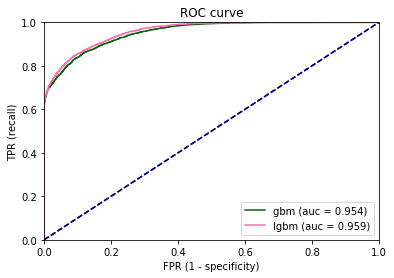

In [28]:
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, 
                                  gbm.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_gbm, tpr_gbm, 'gbm', 'darkgreen')

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, 
                                  lgbm.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_lgbm, tpr_lgbm, 'lgbm', 'hotpink')

In [57]:
new = pd.read_csv('kaggle_data/human_new.csv',encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H0001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H0002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H0003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H0004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H0005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [58]:
new.rename(columns={'아이디':'ID'}, inplace=True)
new.rename(columns={'나이':'age'}, inplace=True)
new.rename(columns={'노동 계급':'Working Class'}, inplace=True)
new.rename(columns={'학력':'Academic Background'}, inplace=True)
new.rename(columns={'교육 수':'Education Number'}, inplace=True)
new.rename(columns={'혼인 상태':'Married'}, inplace=True)
new.rename(columns={'직업':'Job'}, inplace=True)
new.rename(columns={'관계':'Relationship'}, inplace=True)
new.rename(columns={'인종':'Race'}, inplace=True)
new.rename(columns={'성별':'Sex'}, inplace=True)
new.rename(columns={'자본 이득':'Capital Gain'}, inplace=True)
new.rename(columns={'자본 손실':'Capital Loss'}, inplace=True)
new.rename(columns={'주당 시간':'Hours Per Week'}, inplace=True)
new.rename(columns={'모국':'Country'}, inplace=True)

In [59]:
new.dropna()

,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Capital Gain,Capital Loss,Hours Per Week,Country
0,H0001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H0002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H0003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H0004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
5,H0006,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,H16276,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,0,0,40,United-States
16276,H16277,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,36,United-States
16278,H16279,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,50,United-States
16279,H16280,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,5455,0,40,United-States


In [60]:
new['age_level'] = new['age'].apply(lambda x : 1 if x < 20
                                 else 2 if 20 <= x < 40
                                 else 3 if 40 <= x < 60
                                 else 4)

In [61]:
new['Hours Per Week_level'] = new['Hours Per Week'].apply(lambda x : 1 if x < 25
                                 else 2 if 25 <= x < 40
                                 else 3 if 40 <= x < 60
                                 else 4)

In [62]:
new['Capital'] = new['Capital Gain'] - new['Capital Loss']

In [63]:
new['Capital'] = new['Capital'].apply(lambda x: 2 if x > 0
                                   else 1 if x < 0
                                   else 0)

In [64]:
obj1 = ['Working Class', 'Academic Background', 'Married', 'Job', 'Relationship', 'Race', 'Country']
new[obj1] = new[obj1].apply(lambda x: x.astype('category').cat.codes)
new.head()

,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Capital Gain,Capital Loss,Hours Per Week,Country,age_level,Hours Per Week_level,Capital
0,H0001,25,3,226802,1,7,4,6,3,2,0,0,40,37,2,3,0
1,H0002,38,3,89814,11,9,2,4,0,4,0,0,50,37,2,3,0
2,H0003,28,1,336951,7,12,2,10,0,4,0,0,40,37,2,3,0
3,H0004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,3,3,2
4,H0005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,2,0


In [94]:
best_model = lgbm
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True).score(X_test, y_test)

[1]	valid_0's auc: 0.937454	valid_0's binary_logloss: 0.629847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.939542	valid_0's binary_logloss: 0.581126
[3]	valid_0's auc: 0.941783	valid_0's binary_logloss: 0.540528
[4]	valid_0's auc: 0.943109	valid_0's binary_logloss: 0.506324
[5]	valid_0's auc: 0.943981	valid_0's binary_logloss: 0.477377
[6]	valid_0's auc: 0.944432	valid_0's binary_logloss: 0.452575
[7]	valid_0's auc: 0.945353	valid_0's binary_logloss: 0.430796
[8]	valid_0's auc: 0.945817	valid_0's binary_logloss: 0.412118
[9]	valid_0's auc: 0.946389	valid_0's binary_logloss: 0.39582
[10]	valid_0's auc: 0.947531	valid_0's binary_logloss: 0.380876
[11]	valid_0's auc: 0.948613	valid_0's binary_logloss: 0.367098
[12]	valid_0's auc: 0.949269	valid_0's binary_logloss: 0.35545
[13]	valid_0's auc: 0.950421	valid_0's binary_logloss: 0.344755
[14]	valid_0's auc: 0.951407	valid_0's binary_logloss: 0.334961
[15]	valid_0's auc: 0.951815	valid_0's binary_logloss

[181]	valid_0's auc: 0.9716	valid_0's binary_logloss: 0.209163
[182]	valid_0's auc: 0.971528	valid_0's binary_logloss: 0.209385
[183]	valid_0's auc: 0.971575	valid_0's binary_logloss: 0.209347
[184]	valid_0's auc: 0.971528	valid_0's binary_logloss: 0.209509
[185]	valid_0's auc: 0.971541	valid_0's binary_logloss: 0.209495
[186]	valid_0's auc: 0.971613	valid_0's binary_logloss: 0.209282
[187]	valid_0's auc: 0.971676	valid_0's binary_logloss: 0.209114
[188]	valid_0's auc: 0.971658	valid_0's binary_logloss: 0.209211
[189]	valid_0's auc: 0.971605	valid_0's binary_logloss: 0.209381
[190]	valid_0's auc: 0.971662	valid_0's binary_logloss: 0.209203
[191]	valid_0's auc: 0.971652	valid_0's binary_logloss: 0.209259
[192]	valid_0's auc: 0.971653	valid_0's binary_logloss: 0.209335
[193]	valid_0's auc: 0.971623	valid_0's binary_logloss: 0.209457
[194]	valid_0's auc: 0.971644	valid_0's binary_logloss: 0.209382
[195]	valid_0's auc: 0.971658	valid_0's binary_logloss: 0.209389
[196]	valid_0's auc: 0.9716

0.9064432475563535

In [83]:
new['Sex'] = best_model.predict(new.loc[:,'age':'Capital'])

In [84]:
print(best_model.predict_proba(new.loc[:,'age':'Capital']))
new['pred_prob'] = best_model.predict_proba(new.loc[:,'age':'Capital'])[:,1]
new

[[0.6160999  0.3839001 ]
 [0.00799768 0.99200232]
 [0.011393   0.988607  ]
 ...
 [0.00956755 0.99043245]
 [0.6756605  0.3243395 ]
 [0.00851972 0.99148028]]


,ID,age,Working Class,fnlwgt,Academic Background,Education Number,Married,Job,Relationship,Race,Capital Gain,Capital Loss,Hours Per Week,Country,age_level,Hours Per Week_level,Capital,Sex,pred_prob
0,H0001,25,3,226802,1,7,4,6,3,2,0,0,40,37,2,3,0,0,0.383900
1,H0002,38,3,89814,11,9,2,4,0,4,0,0,50,37,2,3,0,1,0.992002
2,H0003,28,1,336951,7,12,2,10,0,4,0,0,40,37,2,3,0,1,0.988607
3,H0004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,3,3,2,1,0.989523
4,H0005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,2,0,0,0.217499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,H16277,39,3,215419,9,13,0,9,1,4,0,0,36,37,2,2,0,0,0.090349
16277,H16278,64,-1,321403,11,9,6,-1,2,2,0,0,40,37,4,3,0,0,0.258937
16278,H16279,38,3,374983,9,13,2,9,0,4,0,0,50,37,2,3,0,1,0.990432
16279,H16280,44,3,83891,9,13,0,0,3,1,5455,0,40,37,3,3,2,0,0.324340


In [85]:
new['Sex'].value_counts()

1    8788
0    7493
Name: Sex, dtype: int64

In [86]:
new.to_csv("predict.csv", index=False, encoding = 'cp949')

In [92]:
new1 = new[['ID', 'Sex']]

In [93]:
new1.to_csv("predict7.csv", index=False, encoding = 'cp949')